# Задание
Модель: Ridge Regression [Ridge](https://scikit-learn.org/0.21/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

Параметры: bedrooms, waterfront, sqft_living

# Подготовка выборки
Загрузим и изучим выборку. Как мы видим ниже, примерно 10% вариантов значений цен имеют только один объект недвижимости, а дальнейшее изучение выборки дает понимание, что такие аномалии являются либо ошибками ввода (например, значения вроде 460.001 вместо 460.000), либо чрезмерной погрешностью оценки (например, 332.220 долларов).

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("kc_house_data.csv")

y = data["price"]
X = data[["bedrooms", "waterfront", "sqft_living"]]

total = 0
ones = []
for c, v in y.value_counts().items():
    if v == 1:
        ones.append(c)
    total += v
print(total, len(ones))
print(ones)

21613 2395
[724000.0, 2271150.0, 162950.0, 919000.0, 853505.0, 166950.0, 670500.0, 593567.0, 1637500.0, 355900.0, 282950.0, 421200.0, 599995.0, 383900.0, 727160.0, 532170.0, 890900.0, 1825000.0, 836500.0, 445700.0, 1089000.0, 1047000.0, 281700.0, 1802750.0, 648752.0, 630100.0, 1681000.0, 253750.0, 734950.0, 656500.0, 624900.0, 339300.0, 379770.0, 480500.0, 807100.0, 578550.0, 899950.0, 300499.0, 326188.0, 1629000.0, 827235.0, 510250.0, 379400.0, 2480000.0, 294450.0, 268300.0, 894400.0, 476800.0, 455600.0, 1256500.0, 182200.0, 965800.0, 788600.0, 508300.0, 2384000.0, 266750.0, 601002.0, 352900.0, 324800.0, 1046250.0, 1468000.0, 734500.0, 819900.0, 497500.0, 386100.0, 297975.0, 330490.0, 274975.0, 186375.0, 533300.0, 78000.0, 2187730.0, 299250.0, 635250.0, 545400.0, 1120280.0, 696950.0, 3065000.0, 636100.0, 3640900.0, 684680.0, 2510000.0, 439800.0, 261590.0, 678700.0, 120750.0, 268750.0, 424900.0, 551100.0, 195500.0, 549800.0, 287600.0, 1870000.0, 225900.0, 619850.0, 605125.0, 497950.0, 

Попробуем "спасти" такие значения округлив все цены до десятков тысяч долларов, т.к. меньшая погрешность является маловажной в изучаемом вопросе (рынок жилья в Сиэттле и его окресностях это объекты стоимостью сотни тысяч/миллионы долларов).

In [73]:
import pandas as pd
import numpy as np

data = pd.read_csv("kc_house_data.csv")

y = data["price"].apply(lambda x: int(10000 * round(float(x) / 10000)))
X = data[["bedrooms", "waterfront", "sqft_living"]]

total = 0
ones = []
for c, v in y.value_counts().items():
    if v == 1:
        ones.append(c)
    total += v
print(total, len(ones))
print(ones)

21613 64
[3340000, 1630000, 5350000, 2240000, 5300000, 2110000, 2260000, 5110000, 3070000, 2060000, 3060000, 2270000, 2330000, 3710000, 2570000, 1870000, 1790000, 2510000, 2460000, 3170000, 2030000, 2370000, 2920000, 2630000, 2680000, 1830000, 2160000, 2640000, 3080000, 2940000, 2340000, 2280000, 2420000, 2550000, 2650000, 3420000, 2470000, 2850000, 1670000, 5570000, 7700000, 4000000, 7060000, 2080000, 2290000, 4670000, 2520000, 3600000, 1590000, 4490000, 4500000, 3280000, 1910000, 6880000, 2980000, 3120000, 3850000, 2560000, 2800000, 2530000, 4210000, 1930000, 2410000, 3570000]


Оставшиеся 64 значения мы просто выкинем из датасета как малозначимые выбросы

In [106]:
data = pd.read_csv("kc_house_data.csv")

y = data["price"].apply(lambda x: int(10000 * round(float(x) / 10000)))

total = 0
ones = []
for c, v in y.value_counts().items():
    if v == 1:
        ones.append(c)
    total += v

indieces_to_remove = [k for k, v in y.items() if v in ones]

data = pd.read_csv("kc_house_data.csv")
[data.drop(i, axis=0, inplace=True) for i in indieces_to_remove]
y = data["price"].apply(lambda x: int(10000 * round(float(x) / 10000)))
X = data[["bedrooms", "waterfront", "sqft_living"]]

print(len(y), len(X))

21549 21549


# Разделение выборки на тренировочную и тестовую

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [101]:
print(X_train)

       bedrooms  waterfront  sqft_living  bathrooms
1277          2           0         2630       2.50
395           2           0         1220       1.00
15082         3           0         1330       1.00
19324         3           0         3850       3.00
20060         4           0         2612       2.50
...         ...         ...          ...        ...
11203         4           0         2040       2.50
11611         4           0         2090       2.50
12853         4           0         1880       2.25
1113          4           0         3030       3.25
21415         4           0         2245       2.50

[15084 rows x 4 columns]


# Нормализация данных

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Обучение модели на тренировочной выборке

In [109]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

# Делаем предсказание используя обученную модель

In [110]:
y_pred = ridge.predict(X_test)
print(y_pred)

[811467.8245701  403906.4179587  772401.77539797 ... 838897.17824416
 409537.84796067 654604.42630879]


# Определяем среднеквадратичную ошибку

In [126]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


baseline_prediction = np.median(y_train)
baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(baseline_mse, mse, baseline_mse / mse)

118920665119.87625 54524691505.17156 2.181042420177597


# Рисуем гистограмму

Заметим, что тренированая модель дает результат примерно вдвое лучший, чем предсказание с использованием медианных значений аттрибутов

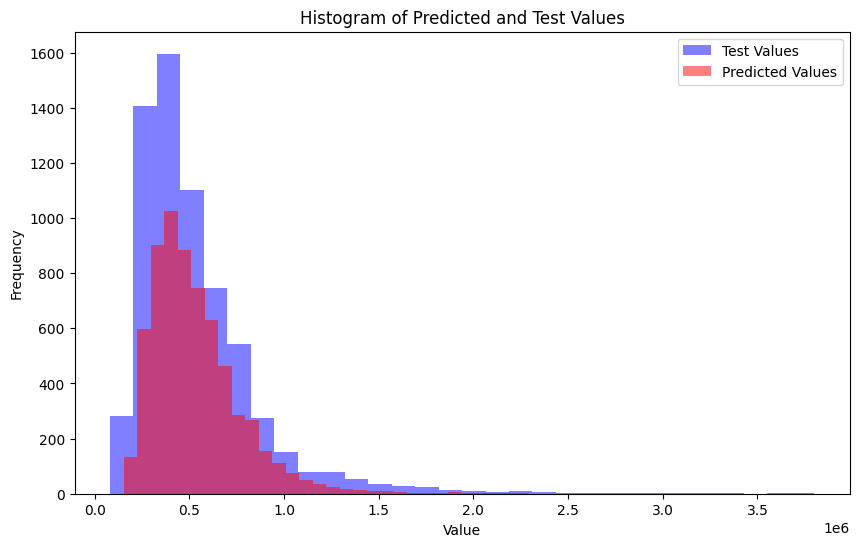

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Test Values')
plt.hist(y_pred, bins=30, alpha=0.5, color='red', label='Predicted Values')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted and Test Values')
plt.legend()

plt.show()

Из анализа гистограммы мы можем сделать вывод, что алгоритм оценки хоть и дает относительно схожее распределение значений оценки цены, но при этом стабильно переоценивает объекты недвижимости примерно на 50%, что является высокой погрешностью оценки.